In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import  PCA

## 对数据 data11-01 处理

In [2]:
data1 = pd.read_csv('data11-01.csv',parse_dates=True)
data1.head()

,mpg,engine,horse,weight,accel,year,origin,cylinder,filter_$
0,18.0,307.0,130.0,3504,12.0,70,1.0,8.0,0.0
1,15.0,350.0,165.0,3693,11.5,70,1.0,8.0,0.0
2,18.0,318.0,150.0,3436,11.0,70,1.0,8.0,0.0
3,16.0,304.0,150.0,3433,12.0,70,1.0,8.0,0.0
4,17.0,302.0,140.0,3449,10.5,70,1.0,8.0,0.0


In [3]:
data1.isnull().sum()

mpg         8
engine      0
horse       6
weight      0
accel       0
year        0
origin      1
cylinder    1
filter_$    8
dtype: int64

In [4]:
data1.fillna(value=data1.mean(), inplace=True);

In [5]:
pca1 = PCA(n_components=data1.shape[1])
pca1.fit(data1)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [6]:
np.cumsum(pca1.explained_variance_ratio_)

array([ 0.99747882,  0.99956734,  0.99993423,  0.99998226,  0.99999501,
        0.99999908,  0.99999958,  0.99999996,  1.        ])

In [7]:
pca1.n_components = 1
data1_transform = pca1.fit_transform(data1)

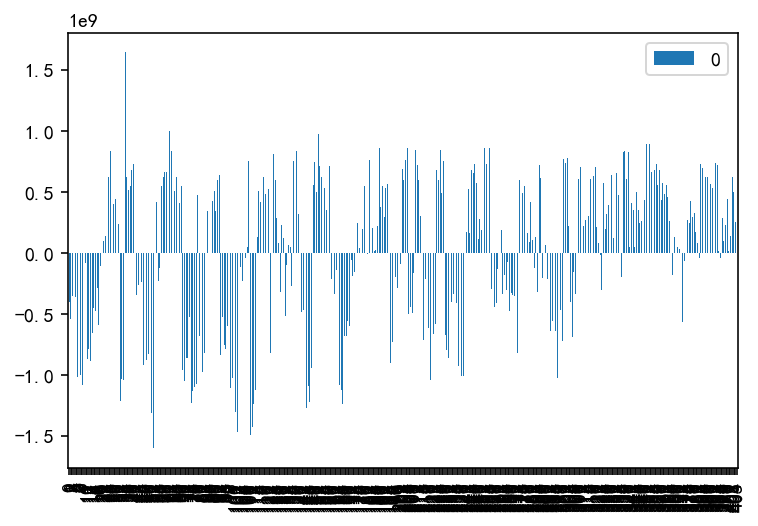

In [8]:
f1 = np.dot(data1_transform, pca1.explained_variance_)
f1 = pd.DataFrame(f1, index=data1.index)
f1.plot.bar();

## 对数据 data13-01a 处理

In [9]:
data2 = pd.read_csv('data13-01a.csv', index_col=0)
data2.head()

,pop,school,employ,services,house
no,,,,,
1,5700,12.8,2500,270,25000
2,1000,10.9,600,10,10000
3,3400,8.8,1000,10,9000
4,3800,13.6,1700,140,25000
5,4000,12.8,1600,140,25000


In [10]:
from sklearn.decomposition import  PCA
pca2 = PCA(n_components=data2.shape[1])
pca2.fit(data2)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
np.cumsum(pca2.explained_variance_ratio_)

array([ 0.7525993 ,  0.99882036,  0.99994742,  0.99999999,  1.        ])

In [12]:
pca2.n_components = 2
data2_transform = pca2.fit_transform(data2)

In [23]:
f2 = np.dot(data2_transform, pca2.explained_variance_ratio_)
f2 = pd.DataFrame(f2, index=data2.index.values)

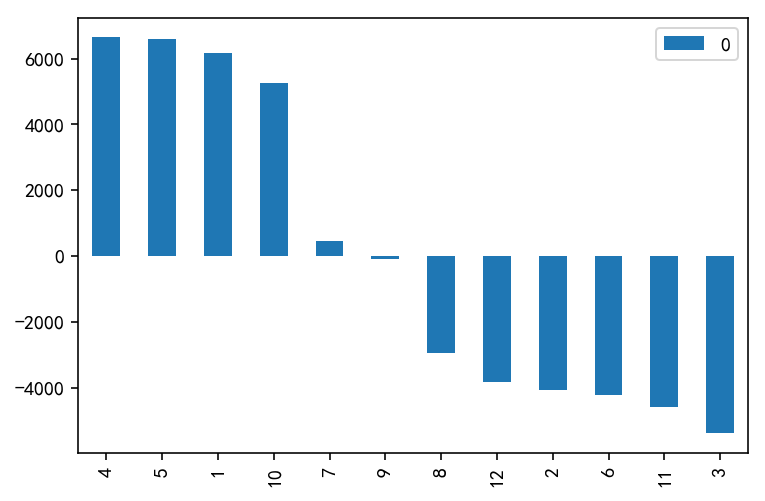

In [24]:
f2.sort_values(0, ascending=False).plot.bar();